 # Практическая работа №3: Кластерный анализ.
Выполнил студент гр. 0373 Морев Иван. Вариант №13

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа,
в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения
*Кластерный анализ* - задача разбиения заданной выборки объектов (ситуаций) на подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались.

*Евклидово расстояние:*  
$d(x, y) = \sqrt{\Sigma (x_{i} - y_{i})^{2}}$   

*Манхенттенское расстояние:*  
$d(x, y) = \Sigma |x_{i} - y_{i}|$

*Метод минимакс:*  
$X_{норм} = \frac{X - X_{min}}{X_{max} - X_{min}}$   

*Описание алгоритма метода k-means*:

1. Случайно выбираются k точек, являющиеся начальными центрами кластеров
2. Относим каждый объект к кластеру с ближайщим центроидом
3. Перестраиваем центроиды
4. Если критерий остановки неудовлетворен, то возвращаемся к пункту 2

*Описание алгоритма метода k-medians* метод k-means, за тем отличием, что при определении центроида берутся медианы, а не средние значения, а в качестве метрики Манхеттенское расстояние, а не Евклидово.  

*Описание алгоритма forel-метода* - на каждой итерации случайным образом выбирается объект из выборки, вокруг него раздувается сфера (окружность) радиуса R, внутри этой сферы выбирается центр тяжести (центр новой сферы). После того как центр сферы стабилизируется, все объекты внутри сферы с этим центром помечаются как кластеризованные и выкидываются из выборки. Этот процесс мы повторяется до тех пор, пока вся выборка не будет кластеризована. Для данного метода радиус из промежутка: $[R_{min};R_{max}]$, где $R_{min}$ и $R_{max}$ получают из матрицы $D=\left\{ d_{ij}\right\}_{i\gt j}$: $R_{min}=min\left\{d_{ij}\gt{0}\right\}, R_{max}=max\left\{ d_{ij}\right\}$

*Описание алгоритма метода силэтов*: 
1. Вычисляется коэффициент силуэта с помощью внутрикластерного расстояния и среднего расстояния до ближайшего кластера по каждому кластеру: $S_i = \frac{b_i-a_i}{\max(a_i;b_i)}$, где $a_i = \frac{1}{\#C_j-1}\sum_{x_j \in C_i}d(x_j,x_{C_j})$; $b_i = \min_{j \ne i}\frac{1}{\#C_j}\sum_{x_j \in C_j}d(x_j,x_{C_i})$
2. Находится $S = \frac{1}{k}\sum_{i=1}^k S_i$
3. Строится график зависимости S от k и по пику определяется нужное k

*Метрика* - неотрицательная вещественная функция $d(x, y)$, если:  
* $d(x, y) \geq 0$  
* $d(x, y) = d(y, x)$  
* $d(x, y) \leq d(x, z) + d(z, y)$  

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств
(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [87]:
import numpy as np
import math
import statistics
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sympy import diff, symbols
from math import log 
from numpy import nan


In [88]:
x_main = [
1.94,
1.68,
1.15,
6.08,
2.69,
6.23,
2.43,
2.77,
4.06,
1.93,
3.45,
1.28,
1.45,
4.17,
2.08,
2.9,
1.88,
6.29,
4.13,
2.47,
1.62,
5.4,
5.39,
6.23,
5.69,
6.3,
1.57,
1.48,
2.81,
1.27,
6.06,
2.95,
2.63,
1.97,
5.82,
1.51,
1.15,
3.28,
3.08,
2.62,
3.29,
2.96,
6.23,
2.1,
3.64,
2.4,
3.17,
5.98,
3.13,
5.55,
3.77,
1.23,
4.27,
3.23,
1.67,
9.94,
2.05,
2.89,
5.5,
14.65,
2.62,
1.8,
2.56,
2.99,
2.49,
1.79,
3.24,
2.57,
2.76,
1.73,
2.88,
3.29,
6.48,
1.53,
9.43,
1.96,
3.09,
3.34,
0,
2.82,
4.15,
1.66,
2.62,
2.45,
2.81,
1.98,
2.57,
1.66,
2.98,
7.16,
2.9,
2,
1.84,
1.7,
3.46,
2.02,
4.18,
4.95,
2.72,
2.98,
4.53,
4.5,
1.48,
12,
5.06,
4.66,
5.24,
3.54,
]
y_main = [
3.33,
4.06,
10.35,
1.41,
2.71,
1.44,
3.32,
2.49,
1.94,
3.33,
2.5,
9.04,
5.29,
1.59,
2.95,
2.47,
3.22,
1.35,
1.67,
2.53,
3.92,
1.44,
1.52,
1.34,
1.36,
1.41,
4.07,
5,
2.06,
6.65,
1.35,
2.08,
2.45,
3.14,
1.4,
4.78,
10.75,
1.85,
2.35,
2.45,
1.8,
2.45,
1.38,
3,
1.77,
3.11,
1.93,
1.36,
2.38,
1.47,
1.78,
8.13,
1.53,
2.5,
5.17,
1.19,
2.73,
2.09,
1.4,
1.15,
2.57,
3.43,
2.44,
2.05,
2.71,
3.56,
1.86,
2.57,
2.58,
3.21,
2.54,
1.94,
1.41,
4.5,
1.2,
3.18,
1.99,
1.78,
15.6,
2.1,
1.61,
3.71,
2.39,
2.59,
2.39,
3.52,
2.79,
3.84,
2,
1.29,
2.42,
3.15,
3.42,
3.76,
1.83,
3.14,
1.6,
1.5,
2.53,
2.08,
1.58,
1.61,
4.97,
1.16,
1.48,
1.57,
1.46,
1.84,
]
print(x_main)
print(y_main)

[1.94, 1.68, 1.15, 6.08, 2.69, 6.23, 2.43, 2.77, 4.06, 1.93, 3.45, 1.28, 1.45, 4.17, 2.08, 2.9, 1.88, 6.29, 4.13, 2.47, 1.62, 5.4, 5.39, 6.23, 5.69, 6.3, 1.57, 1.48, 2.81, 1.27, 6.06, 2.95, 2.63, 1.97, 5.82, 1.51, 1.15, 3.28, 3.08, 2.62, 3.29, 2.96, 6.23, 2.1, 3.64, 2.4, 3.17, 5.98, 3.13, 5.55, 3.77, 1.23, 4.27, 3.23, 1.67, 9.94, 2.05, 2.89, 5.5, 14.65, 2.62, 1.8, 2.56, 2.99, 2.49, 1.79, 3.24, 2.57, 2.76, 1.73, 2.88, 3.29, 6.48, 1.53, 9.43, 1.96, 3.09, 3.34, 0, 2.82, 4.15, 1.66, 2.62, 2.45, 2.81, 1.98, 2.57, 1.66, 2.98, 7.16, 2.9, 2, 1.84, 1.7, 3.46, 2.02, 4.18, 4.95, 2.72, 2.98, 4.53, 4.5, 1.48, 12, 5.06, 4.66, 5.24, 3.54]
[3.33, 4.06, 10.35, 1.41, 2.71, 1.44, 3.32, 2.49, 1.94, 3.33, 2.5, 9.04, 5.29, 1.59, 2.95, 2.47, 3.22, 1.35, 1.67, 2.53, 3.92, 1.44, 1.52, 1.34, 1.36, 1.41, 4.07, 5, 2.06, 6.65, 1.35, 2.08, 2.45, 3.14, 1.4, 4.78, 10.75, 1.85, 2.35, 2.45, 1.8, 2.45, 1.38, 3, 1.77, 3.11, 1.93, 1.36, 2.38, 1.47, 1.78, 8.13, 1.53, 2.5, 5.17, 1.19, 2.73, 2.09, 1.4, 1.15, 2.57, 3.43, 2.44

In [89]:
def Kmeans(x,y,mid,n):
    sm=np.inf
    while sm>0.001:    
        list_x=[]
        list_y=[]
        for i in range(n):
            list_x+=[[]]
            list_y+=[[]]
        for i in range(108):
            dist=[0]*n
            for j in range(n):
                dist[j]=((x[i]-mid[j][0])**2+(y[i]-mid[j][1])**2)
            min=100
            for k in range(n):
                if dist[k]<min:
                    min=dist[k]
                    l=k
            list_x[l]+=[x[i]]
            list_y[l]+=[y[i]]
        sum_x=[0]*n
        sum_y=[0]*n
        sm_c=[0]*n
        for i in range(n):
            sum_x[i]=sum(list_x[i])/len(list_x[i])
            sum_y[i]=sum(list_y[i])/len(list_y[i])
        for i in range(n):
            sm_c[i]=(sum_x[i]-mid[i][0])**2+(sum_y[i]-mid[i][1])**2
        sm=sum(sm_c)
        for i in range(n):
            mid[i][0]=round(sum_x[i],2)
            mid[i][1]=round(sum_y[i],2)
        c=[]
        for i in range(n):
            c+=[len(list_x[i])]
    return mid, list_x,list_y,c

def print_gr(mid,list_x,list_y,n):
    fig, graf=plt.subplots(figsize=(10, 6))
    color = ['r','b','g','c','m','y','pink']
    for i in range(n):
        graf.scatter(list_x[i],list_y[i],c=color[i])
        graf.plot(mid[i][0],mid[i][1],'k',marker="P")
    graf.set_title('Количество кластеров: %i'%(i+1))
    plt.grid()
    plt.show()

In [90]:
def Kmedians(x,y,mid,n):
    sm=np.inf
    while sm>0.01:    
        list_x=[]
        list_y=[]
        for i in range(n):
            list_x+=[[]]
            list_y+=[[]]
        for i in range(108):
            dist=[0]*n
            for j in range(n):
                dist[j]=(abs(x[i]-mid[j][0])+abs(y[i]-mid[j][1]))
            min=10000
            for k in range(n):
                if dist[k]<min:
                    min=dist[k]
                    l=k
            list_x[l]+=[x[i]]
            list_y[l]+=[y[i]]
        med_x=[0]*n
        med_y=[0]*n
        sm_c=[0]*n
        for i in range(n):
            med_x[i]=statistics.median(list_x[i])
            med_y[i]=statistics.median(list_y[i])
        for i in range(n):
            sm_c[i]=(abs(med_x[i]-mid[i][0])+abs(med_y[i]-mid[i][1]))
        sm=sum(sm_c)
        for i in range(n):
            mid[i][0]=round(med_x[i],4)
            mid[i][1]=round(med_y[i],4)
        c=[]
        for i in range(n):
            c+=[len(list_x[i])]
    return mid, list_x,list_y,c

In [91]:
def forel(x, y, R):
    mid= []
    clusters = []
    u=[]
    kol_el=[]
    for i in range(len(x)):
        u+=[[x[i],y[i]]]
    while (len(u)!=0):
        xc = u[0]
        while True:
            k=[]
            for i in range(len(u)):
                if ((xc[0]-u[i][0])**2 + (xc[1]-u[i][1])**2)**0.5 <= R:
                    k+=[u[i]]
            xc_=[0,0]
            for i in range(len(k)):
                xc_[0]+=k[i][0]/len(k)
                xc_[1]+=k[i][1]/len(k)
            if xc == xc_:
                break
            xc = xc_
        u = [i for i in u if i not in k]
        mid+=[xc]
        clusters+=[k]
        kol_el+=[len(k)]
    
    return mid,clusters,kol_el
def gr(center,cl):
    fig, graf=plt.subplots(figsize=(10, 6))
    color= ['b','m','r','g','y','c','pink','orange','brown','violet','darklime','gold','darkblue','olive','darkgreen','darkgrey','lightgrey','darkviolet','peru']
    for j in range(len(cl)):
        for k in range(len(cl[j])):
            graf.scatter(cl[j][k][0],cl[j][k][1],c=color[j])
        plt.plot(center[j][0],center[j][1],'k',marker="P")   
    plt.grid()
    plt.show()

## 1.Нормализовать множество точек из предыдущей работы, отобразить полученное множество.

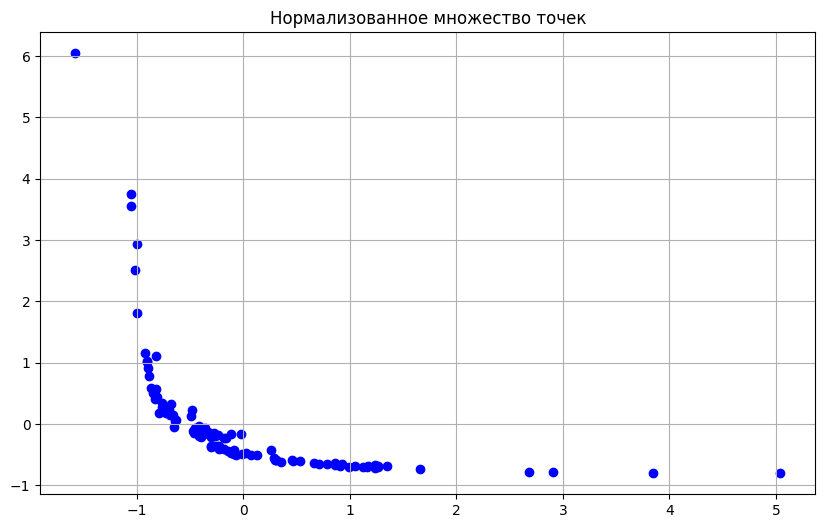

In [92]:
mod,mod2=0,0
for i in range(108):
    mod+=x_main[i]/108
    mod2+=y_main[i]/108
dis,dis2=0,0
for i in range(108):
    dis+=(x_main[i]-mod)**2/108
    dis2+=(y_main[i]-mod2)**2/108
sko=np.sqrt(dis)
sko2=np.sqrt(dis2)
for i in range(108):
    x_main[i]=(x_main[i]-mod)/sko
    y_main[i]=(y_main[i]-mod2)/sko2
plt.subplots(figsize=(10, 6))
plt.scatter(x_main,y_main,c='b')
plt.title("Нормализованное множество точек")
plt.grid()
plt.show()

## 2.Определить «грубую» верхнюю оценку количества кластеров ˜𝑘.

In [93]:
up_mark=int(np.sqrt(54))
print("Грубая верхняя оценка количества кластеров равна:",up_mark)

Грубая верхняя оценка количества кластеров равна: 7


## 3.Реализовать алгоритм k-means. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды

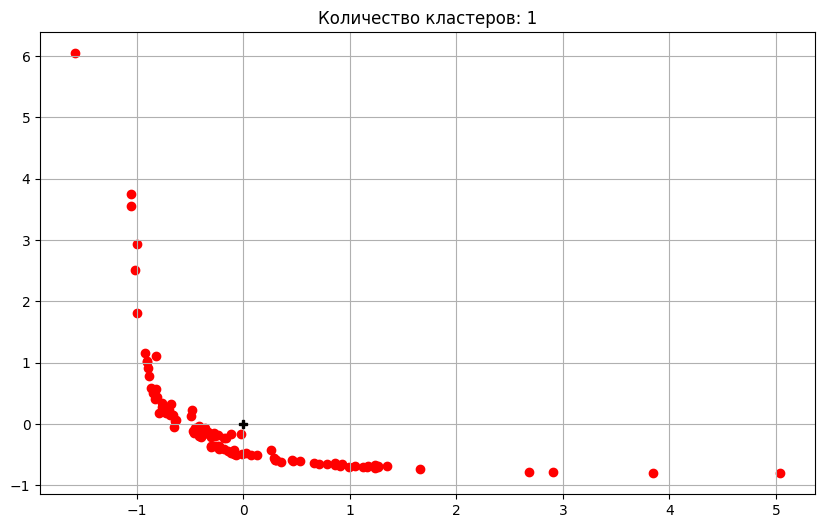

Центроиды: [[0.0, 0.0]]
Количество элементов в кластерах [108]


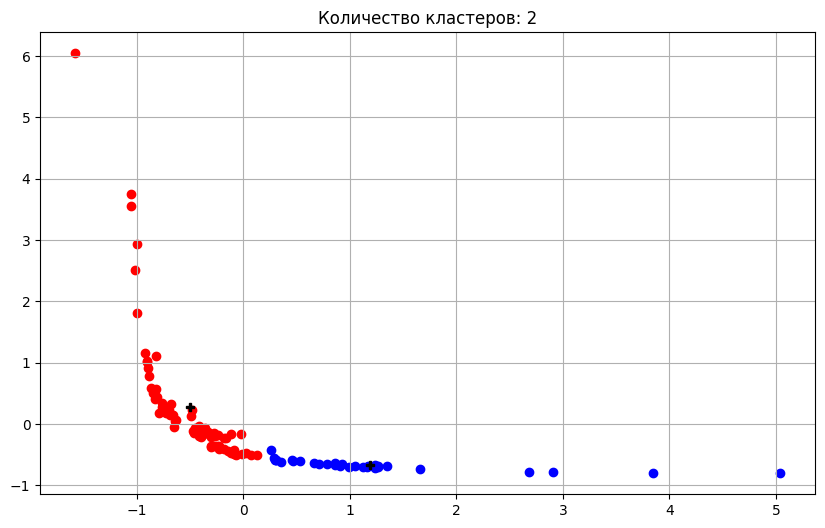

Центроиды: [[-0.5, 0.28], [1.19, -0.66]]
Количество элементов в кластерах [76, 32]


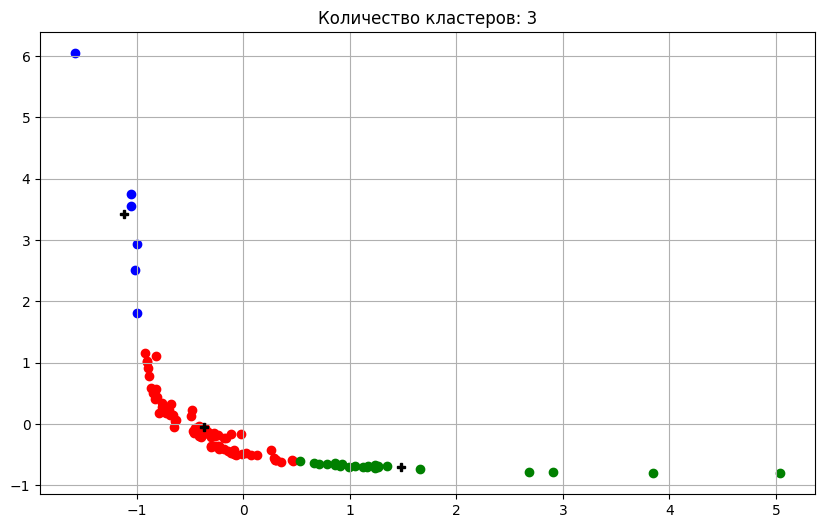

Центроиды: [[-0.37, -0.05], [-1.12, 3.43], [1.48, -0.7]]
Количество элементов в кластерах [78, 6, 24]


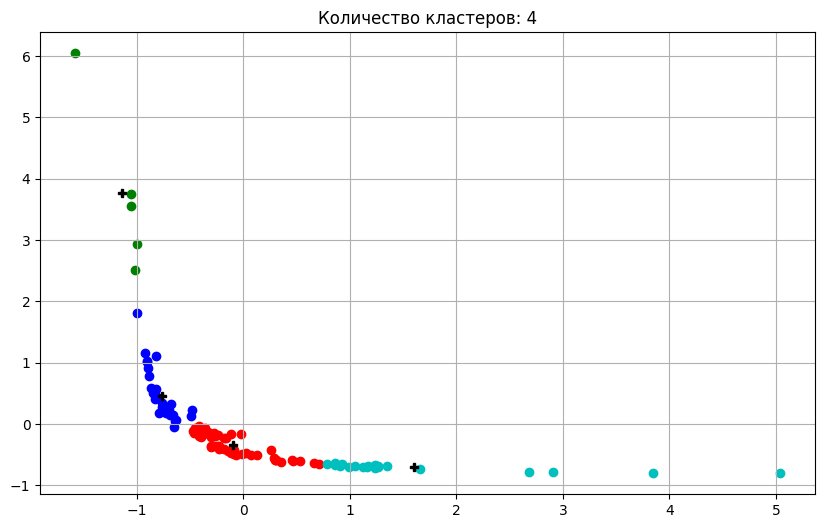

Центроиды: [[-0.1, -0.34], [-0.76, 0.46], [-1.14, 3.76], [1.6, -0.7]]
Количество элементов в кластерах [52, 30, 5, 21]


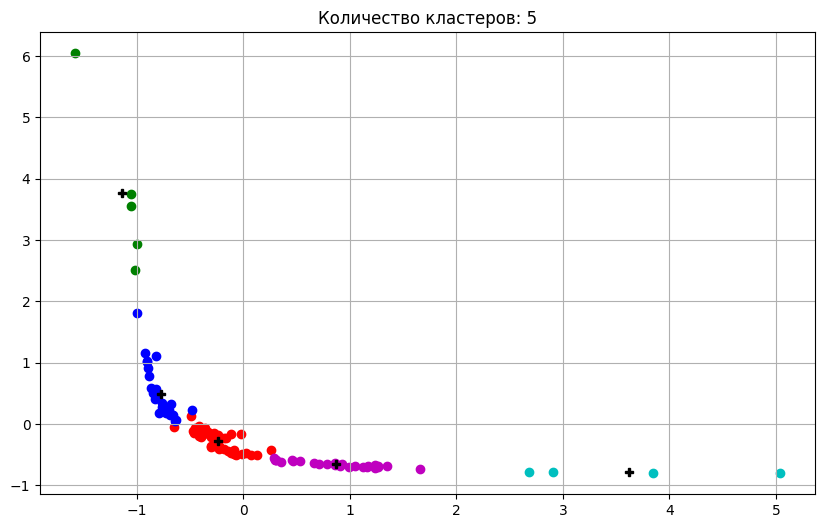

Центроиды: [[-0.24, -0.27], [-0.77, 0.49], [-1.14, 3.76], [3.62, -0.79], [0.87, -0.65]]
Количество элементов в кластерах [44, 28, 5, 4, 27]


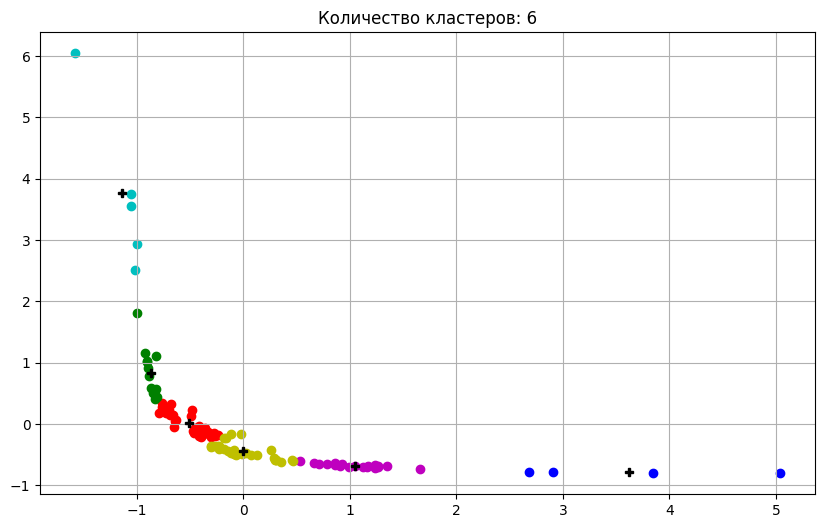

Центроиды: [[-0.51, 0.01], [3.62, -0.79], [-0.87, 0.83], [-1.14, 3.76], [1.05, -0.68], [-0.0, -0.44]]
Количество элементов в кластерах [36, 4, 13, 5, 20, 30]


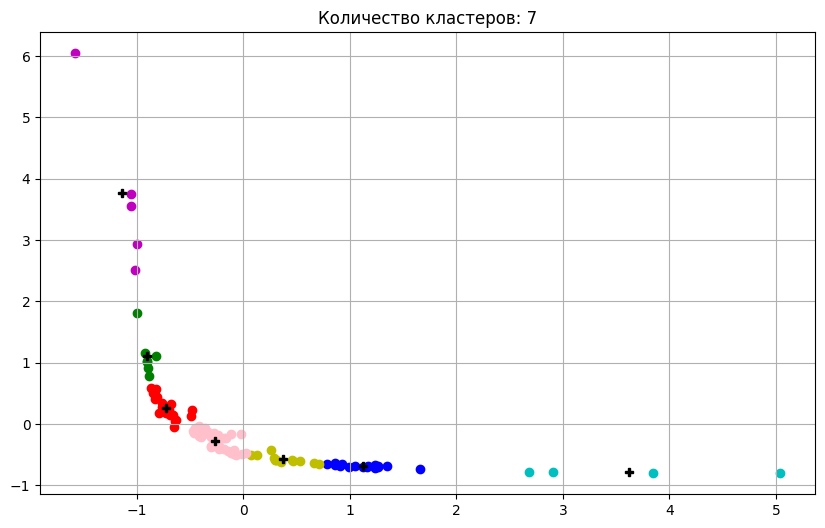

Центроиды: [[-0.72, 0.26], [1.12, -0.68], [-0.9, 1.11], [3.62, -0.79], [-1.14, 3.76], [0.37, -0.57], [-0.26, -0.27]]
Количество элементов в кластерах [23, 17, 7, 4, 5, 13, 39]


In [102]:
from prettytable import PrettyTable
C = [[[x_main[10], y_main[10]]],
     [[x_main[10], y_main[10]],[x_main[96], y_main[96]]],
     [[x_main[10], y_main[10]],[x_main[67], y_main[67]],[x_main[96], y_main[96]]],
     [[x_main[10], y_main[10]],[x_main[53], y_main[53]],[x_main[78], y_main[78]],[x_main[96], y_main[96]]],
     [[x_main[10], y_main[10]],[x_main[53], y_main[53]],[x_main[78], y_main[78]],[x_main[96], y_main[96]],[x_main[107], y_main[107]]],
     [[x_main[10], y_main[10]],[x_main[34], y_main[34]],[x_main[53], y_main[53]],[x_main[78], y_main[78]],[x_main[96], y_main[96]],[x_main[107], y_main[107]]],
    [[x_main[10], y_main[10]],[x_main[34], y_main[34]],[x_main[53], y_main[53]],[x_main[72], y_main[72]],[x_main[82], y_main[82]],[x_main[96], y_main[96]],[x_main[107], y_main[107]]]]
table = PrettyTable(["Значение k","Центроиды кластера","Объем кластера"])
table1 = PrettyTable(["Значение k","Центроиды кластера","Объем кластера"])
for i in range(up_mark):
    mid,list_x,list_y,kol_el=Kmeans(x_main,y_main,C[i],i+1)
    print_gr(mid,list_x,list_y,i+1)
    print("Центроиды:", mid)
    print("Количество элементов в кластерах",kol_el)
    for j in range(1,i+1):
        table.add_row(["",mid[j],kol_el[j]])

## 4.Реализовать алгоритмы k-medians. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

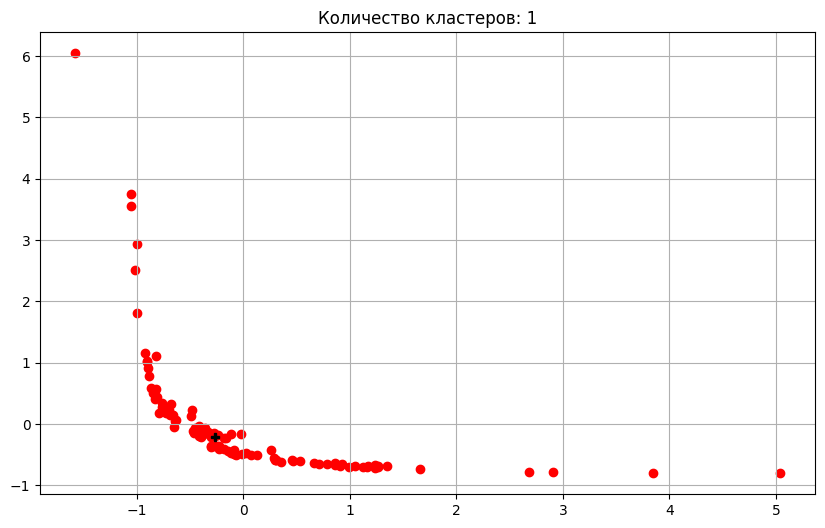

Центроиды: [[-0.2677, -0.208]]
Количество элементов в кластерах [108]


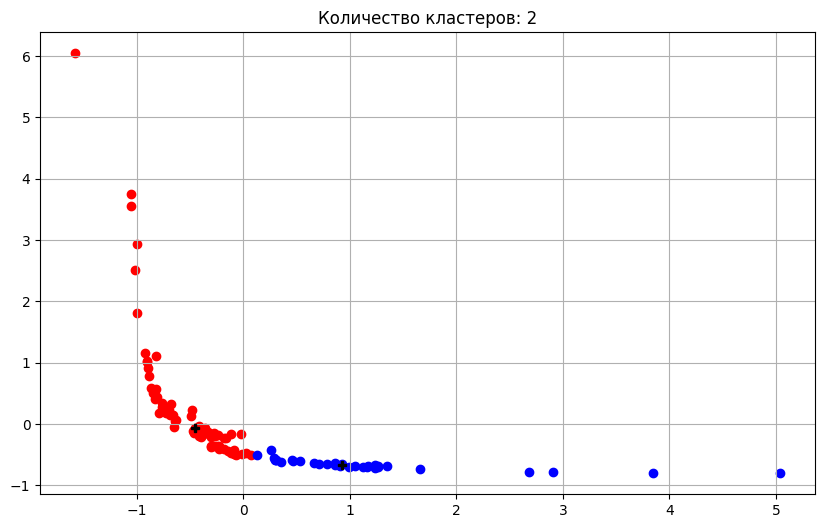

Центроиды: [[-0.4505, -0.0634], [0.9307, -0.6653]]
Количество элементов в кластерах [75, 33]


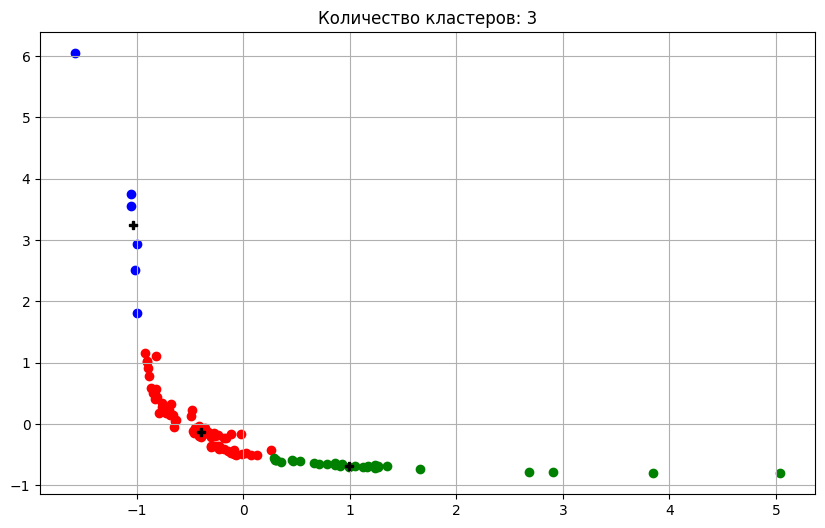

Центроиды: [[-0.3918, -0.1298], [-1.0373, 3.247], [0.9939, -0.6795]]
Количество элементов в кластерах [71, 6, 31]


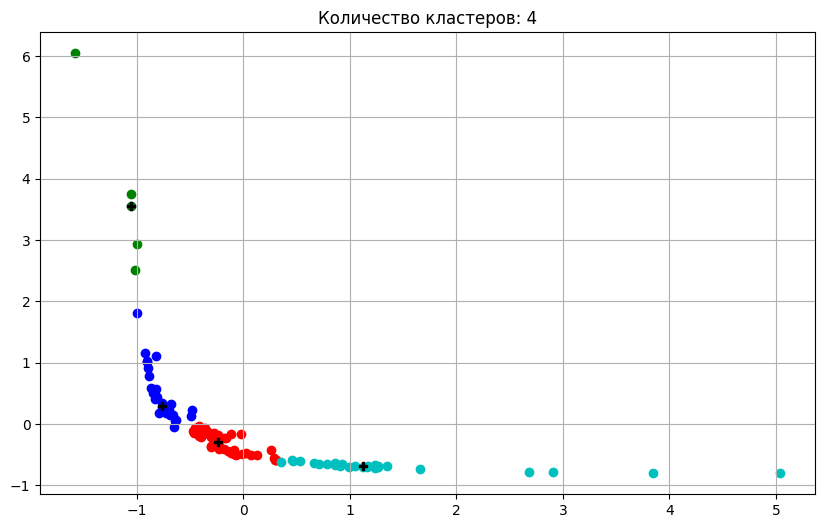

Центроиды: [[-0.2338, -0.2933], [-0.7642, 0.2991], [-1.0553, 3.5574], [1.1248, -0.6795]]
Количество элементов в кластерах [46, 30, 5, 27]


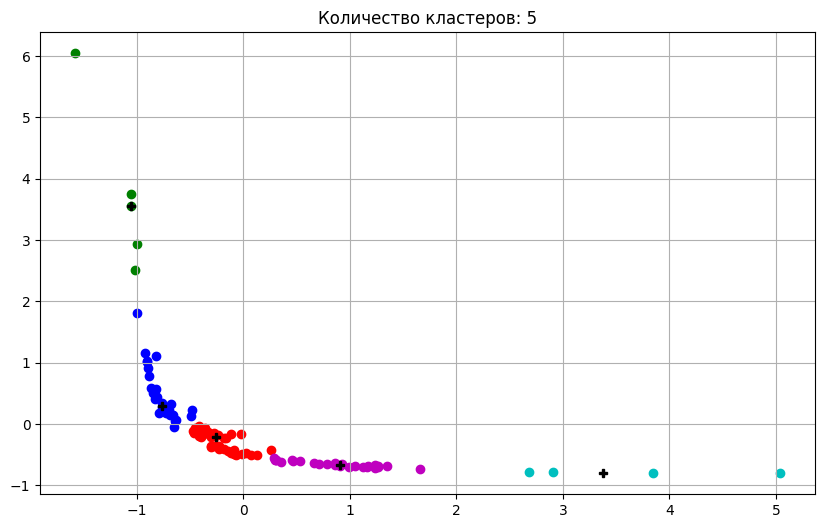

Центроиды: [[-0.2541, -0.2174], [-0.7642, 0.2991], [-1.0553, 3.5574], [3.3772, -0.7909], [0.9081, -0.6653]]
Количество элементов в кластерах [42, 30, 5, 4, 27]


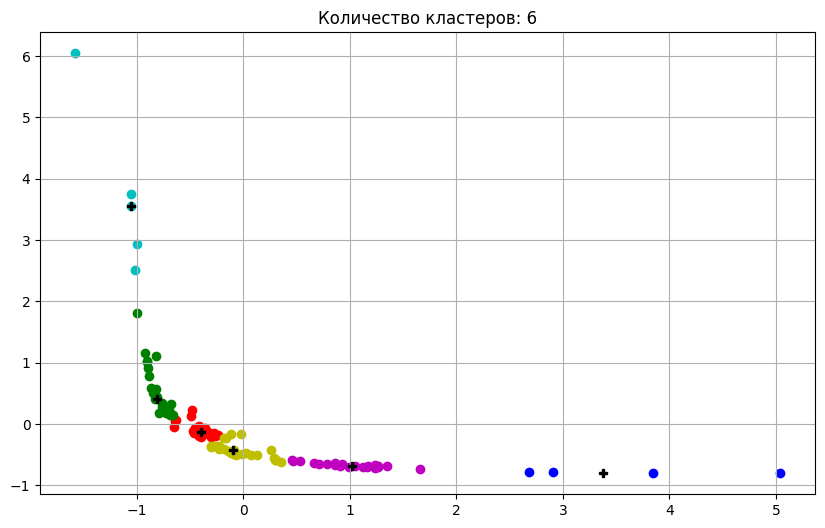

Центроиды: [[-0.3918, -0.1369], [3.3772, -0.7909], [-0.8071, 0.4105], [-1.0553, 3.5574], [1.0232, -0.6795], [-0.0917, -0.4307]]
Количество элементов в кластерах [24, 4, 25, 5, 22, 28]


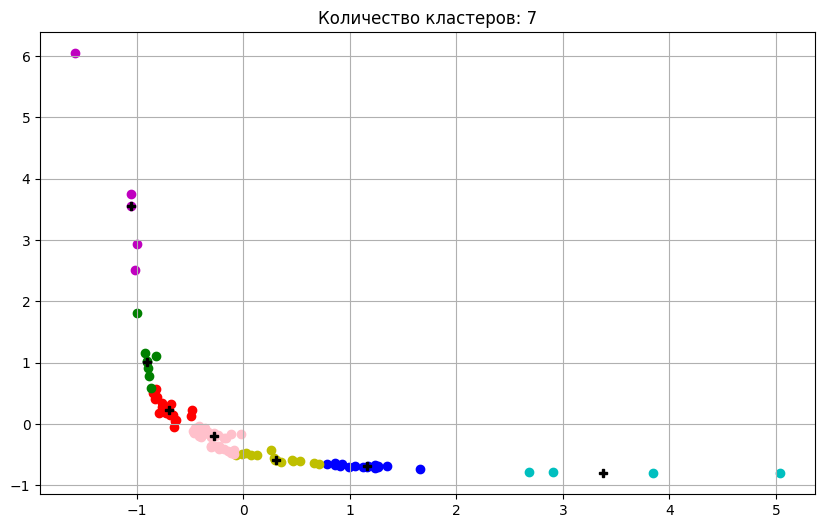

Центроиды: [[-0.701, 0.2281], [1.1609, -0.6843], [-0.8996, 1.0148], [3.3772, -0.7909], [-1.0553, 3.5574], [0.3033, -0.5847], [-0.2722, -0.1961]]
Количество элементов в кластерах [22, 17, 8, 4, 5, 16, 36]


In [103]:
for i in range(up_mark):
    mid,list_x,list_y,kol_el=Kmedians(x_main,y_main,C[i],i+1)
    print_gr(mid,list_x,list_y,i+1)
    print("Центроиды:", mid)
    print("Количество элементов в кластерах",kol_el)
   

## 5.Для каждого метода заполнить таблицу, где значения 𝑘 изменяются от 1 до ˜𝑘:

In [104]:
for i in range(up_mark):
    for j in range(1,i+1):
        table1.add_row(["",mid[j],kol_el[j]])
    for j in range(1,i+1):
        table.add_row(["",mid[j],kol_el[j]])
print("Алгоритм k-means:")
print(table)
print("Алгоритм k-medians:")
print(table1)

Алгоритм k-means:
+------------+--------------------+----------------+
| Значение k | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|            | [0.9307, -0.6653]  |       32       |
|            |  [-1.0373, 3.247]  |       6        |
|            | [0.9939, -0.6795]  |       24       |
|            | [-0.7642, 0.2991]  |       30       |
|            | [-1.0553, 3.5574]  |       5        |
|            | [1.1248, -0.6795]  |       21       |
|            | [-0.7642, 0.2991]  |       28       |
|            | [-1.0553, 3.5574]  |       5        |
|            | [3.3772, -0.7909]  |       4        |
|            | [0.9081, -0.6653]  |       27       |
|            | [3.3772, -0.7909]  |       4        |
|            | [-0.8071, 0.4105]  |       13       |
|            | [-1.0553, 3.5574]  |       5        |
|            | [1.0232, -0.6795]  |       20       |
|            | [-0.0917, -0.4307] |       30       |
|            | [1.1609, -0.6

## 6. С помощью метода силуэтов выявить для каждого метода оптимальное количество кластеров.

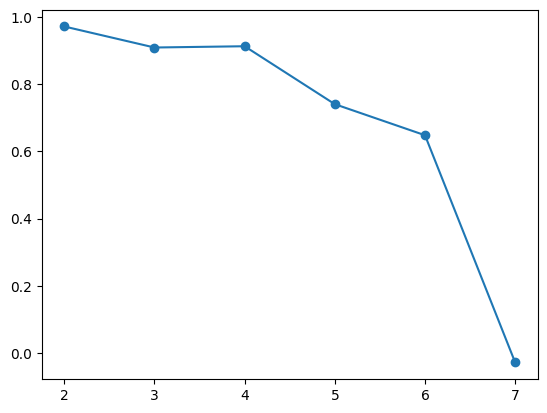

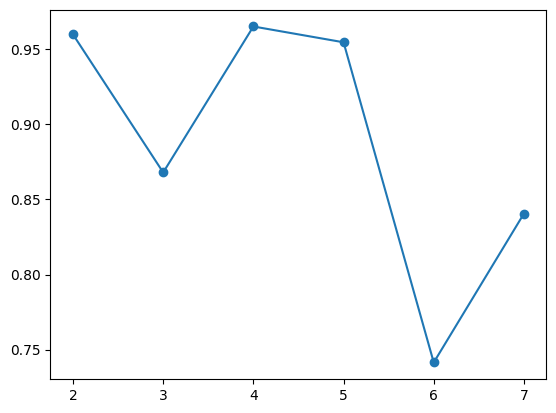

In [105]:
x,y=[],[]
for i in range(1,up_mark):
    x+=[(i+1)]
    mid,list_x,list_y,kol_el=Kmeans(x_main,y_main,C[i],i+1)
    s,sb,sa=[],[],[]
    for j in range(i+1):
        sum_d,sum_d2=0,0
        minimum=1000
        for k in range(i+1):
            if (k!=j):
                for l in range(len(list_x[k])):
                    for p in range(len(list_x[k])):
                        sum_d2+=((list_x[k][l]-list_x[k][p])**2+(list_y[k][l]-list_y[k][p])**2)
                    sum_d+=((list_x[k][l]-mid[k][0])**2+(list_y[k][l]-mid[k][1])**2)
                if sum_d2<minimum:
                    minimum=sum_d2
        sb+=[(minimum/k)/kol_el[k]]
        sa+=[(sum_d/(k+1))/(kol_el[j]-1)]
    for j in range(len(sa)):
        s+=[(sb[j]-sa[j])/(max(sa[j],sb[j]))]
    y+=[sum(s)/len(sa)]
plt.plot(x,y,marker='o')
plt.show()  

x,y=[],[]
for i in range(1,up_mark):
    x+=[(i+1)]
    mid,list_x,list_y,kol_el=Kmedians(x_main,y_main,C[i],i+1)
    s,sb,sa=[],[],[]
    for j in range(i+1):
        sum_d,sum_d2=0,0
        minimum=1000
        for k in range(i+1):
            if (k!=j):
                for l in range(len(list_x[k])):
                    for p in range(len(list_x[k])):
                        sum_d2+=(abs(list_x[k][l]-list_x[k][p])+abs(list_y[k][l]-list_y[k][p]))
                    sum_d+=(abs(list_x[k][l]-mid[k][0])+abs(list_y[k][1]-mid[k][1]))
                if sum_d2<minimum:
                    minimum=sum_d2
        sa+=[(sum_d/k)/(kol_el[j]-1)]
        sb+=[(minimum)/kol_el[k]]
    for j in range(len(sa)):
        s+=[(sb[j]-sa[j])/(max(sb[j],sa[j]))]
    y+=[sum(s)/len(sa)]
plt.plot(x,y,marker='o')
plt.show() 

Вывод: В первом алгориитме оптимальное количество кластеров = 2, а во втором = 4

## 7. Реализовать алгоритм поиска сгущений при различных радиусах 𝑅, отобразить полученные кластеры, выделить каждый кластер разным цветом или маркером, отметить центроиды. Результаты представить в виде таблицы:

Rmin =  0.005
Rmax =  9.52
Радиус =  9.52
Количество кластеров =  1


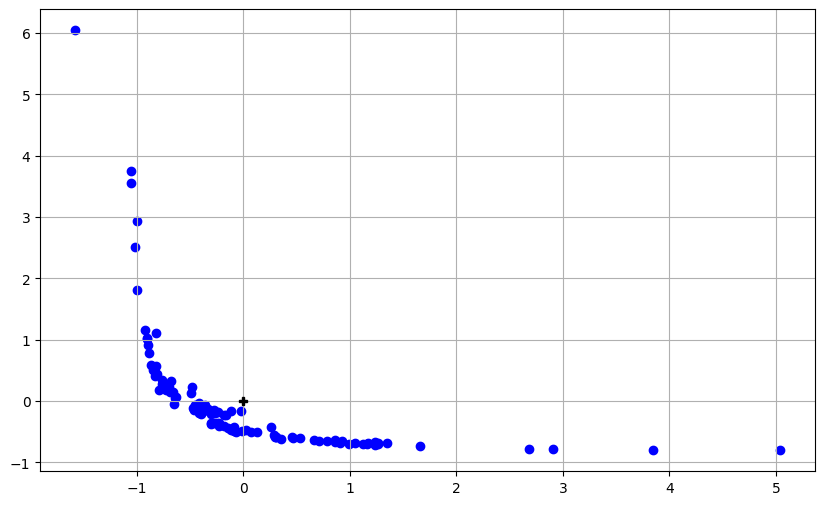

Центроиды: [[0. 0.]]
Объем кластеров: [108]
Радиус =  4.52
Количество кластеров =  3


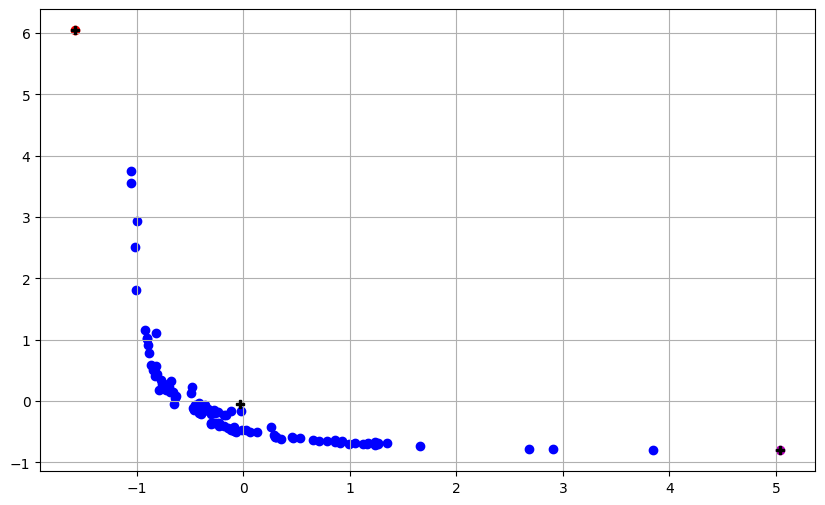

Центроиды: [[-0.033 -0.049]
 [ 5.038 -0.803]
 [-1.574  6.046]]
Объем кластеров: [106, 1, 1]
Радиус =  3.72
Количество кластеров =  3


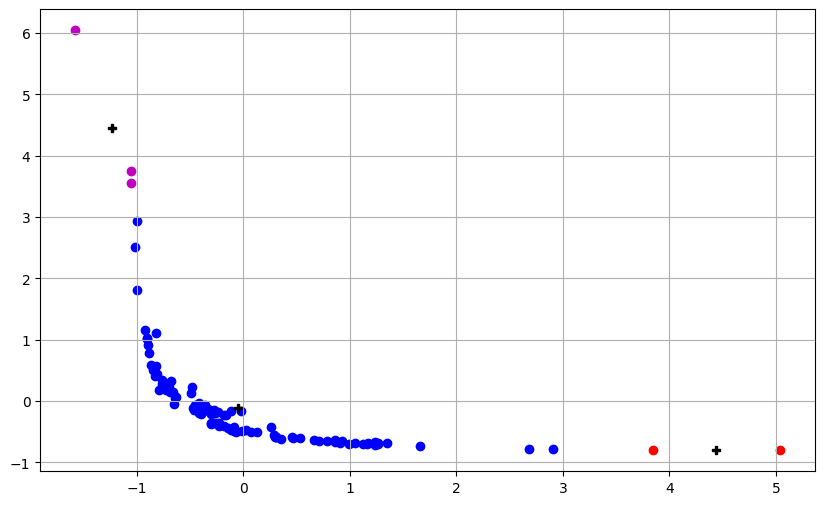

Центроиды: [[-0.05  -0.114]
 [-1.228  4.45 ]
 [ 4.44  -0.8  ]]
Объем кластеров: [103, 3, 2]
Радиус =  3.52
Количество кластеров =  3


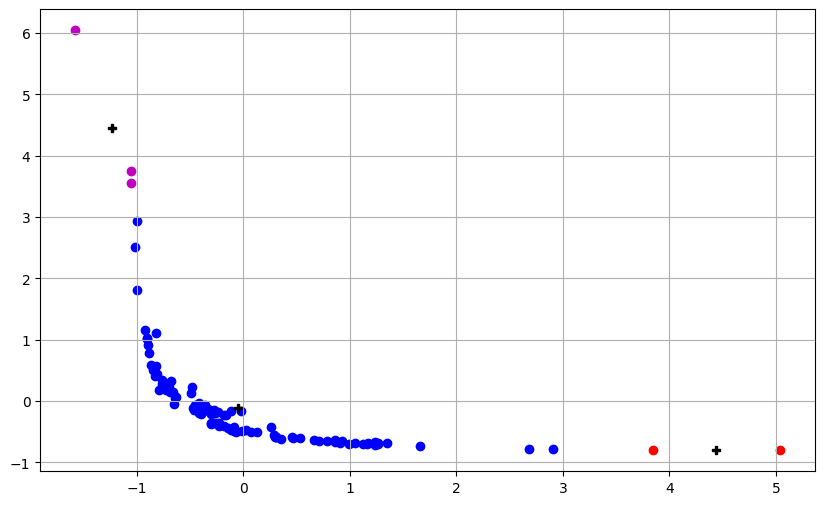

Центроиды: [[-0.05  -0.114]
 [-1.228  4.45 ]
 [ 4.44  -0.8  ]]
Объем кластеров: [103, 3, 2]
Радиус =  3.32
Количество кластеров =  3


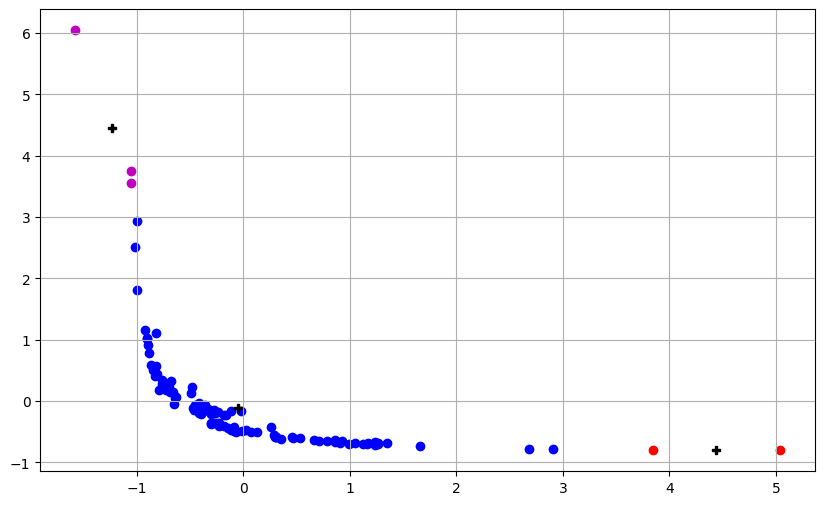

Центроиды: [[-0.05  -0.114]
 [-1.228  4.45 ]
 [ 4.44  -0.8  ]]
Объем кластеров: [103, 3, 2]
+---+--------------------+----------------+
| R | Центроиды кластера | Объем кластера |
+---+--------------------+----------------+
|   |  [5.038, -0.803]   |       1        |
|   |  [-1.574, 6.046]   |       1        |
|   |   [-1.228, 4.45]   |       3        |
|   |    [4.44, -0.8]    |       2        |
|   |   [-1.228, 4.45]   |       3        |
|   |    [4.44, -0.8]    |       2        |
|   |   [-1.228, 4.45]   |       3        |
|   |    [4.44, -0.8]    |       2        |
+---+--------------------+----------------+


In [106]:
m=np.zeros((108,108))
Rmin=1000
Rmax=-1
for i in range(108):
    for j in range(108):
        if i>j:
            m[j][i]=((x_main[i]-x_main[j])**2 + (y_main[i]-y_main[j])**2)**0.5
m=m.tolist()
for i in range(108):
    for j in range(108):
        if Rmax<m[i][j]:
            Rmax=m[i][j]
        if (Rmin>m[i][j]) &(m[i][j]>0):
            Rmin=m[i][j]
print("Rmin = ",round(Rmin,3))
print("Rmax = ",round(Rmax,3))

R=[Rmax,Rmax-5,Rmax-5.8,Rmax-6,Rmax-6.2]
table2 = PrettyTable(["R","Центроиды кластера","Объем кластера"])
for i in range(len(R)):
    mid,cl,kol_el=forel(x_main,y_main,R[i]) 
    print("Радиус = ", round(R[i],3))
    print("Количество кластеров = ",len(cl))
    for k in range(len(cl)):
        for j in range(len(mid[k])):
            mid[k][j]=round(mid[k][j],3)   
    table3.add_row([round(R[i],3),mid[0],kol_el[0]])
    for j in range(1,len(cl)):
        table2.add_row(["",mid[j],kol_el[j]])
    gr(mid,cl)
    print("Центроиды:", np.array(mid))
    print("Объем кластеров:",kol_el)
print(table2)

## 8.Проверить чувствительность метода поиска сгущений к погрешностям. Сделать выводы.

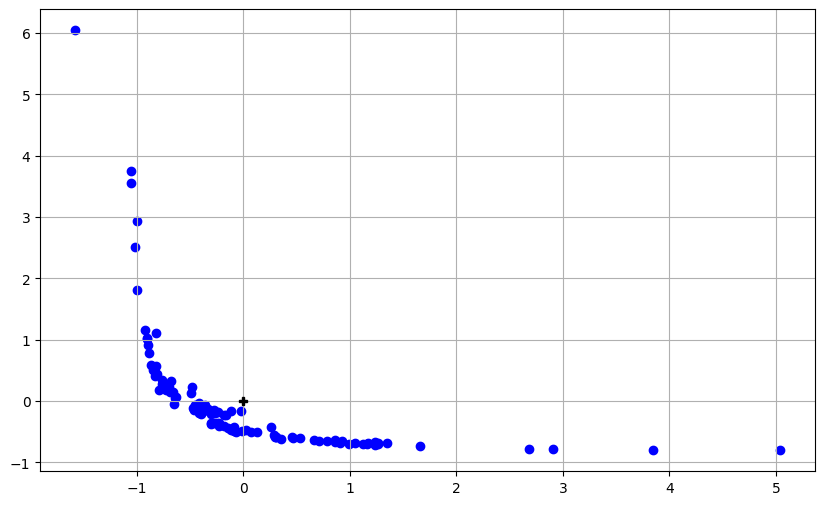

Количество кластеров: 1
Центроиды: [[0. 0.]]
Объем кластеров: [108]


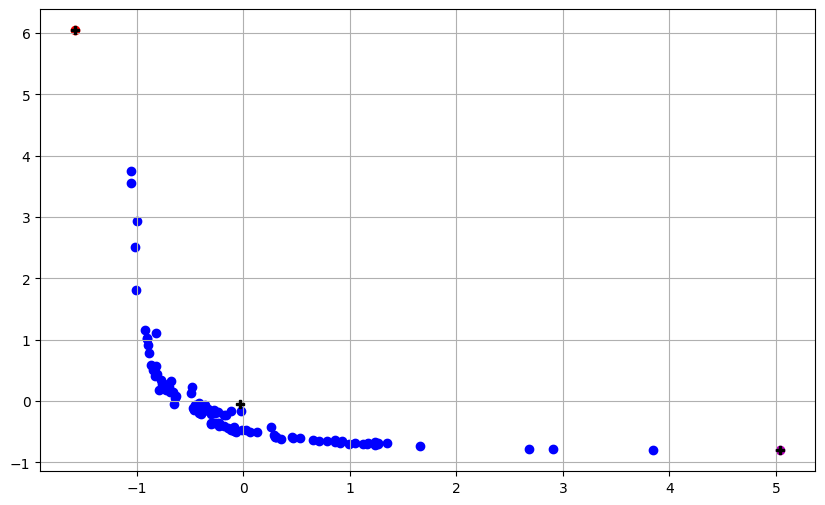

Количество кластеров: 3
Центроиды: [[-0.033 -0.049]
 [ 5.038 -0.803]
 [-1.574  6.046]]
Объем кластеров: [106, 1, 1]


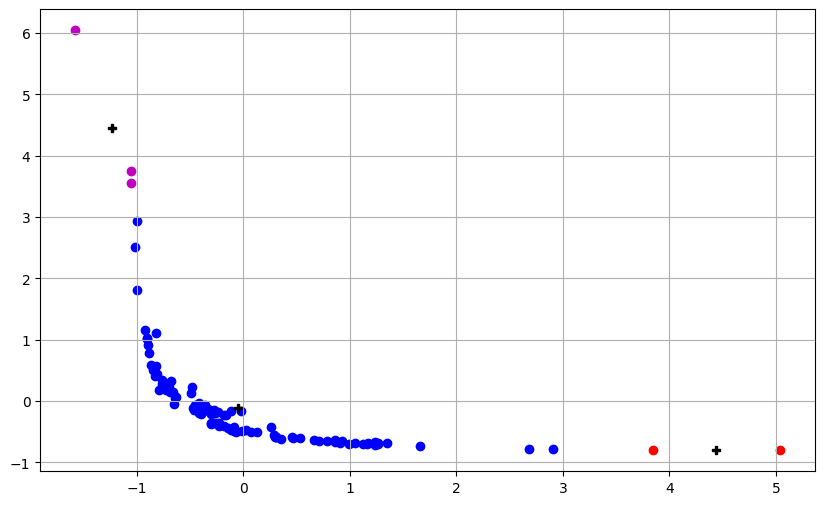

Количество кластеров: 3
Центроиды: [[-0.05  -0.114]
 [-1.228  4.45 ]
 [ 4.44  -0.8  ]]
Объем кластеров: [103, 3, 2]


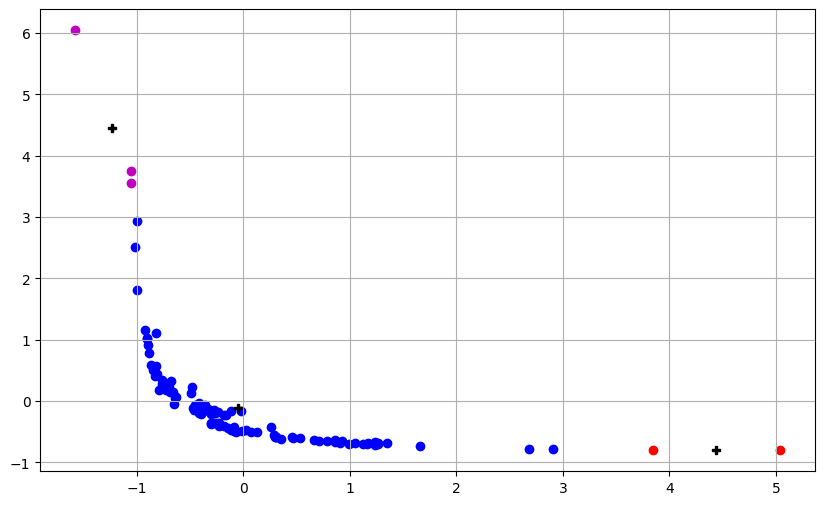

Количество кластеров: 3
Центроиды: [[-0.05  -0.114]
 [-1.228  4.45 ]
 [ 4.44  -0.8  ]]
Объем кластеров: [103, 3, 2]


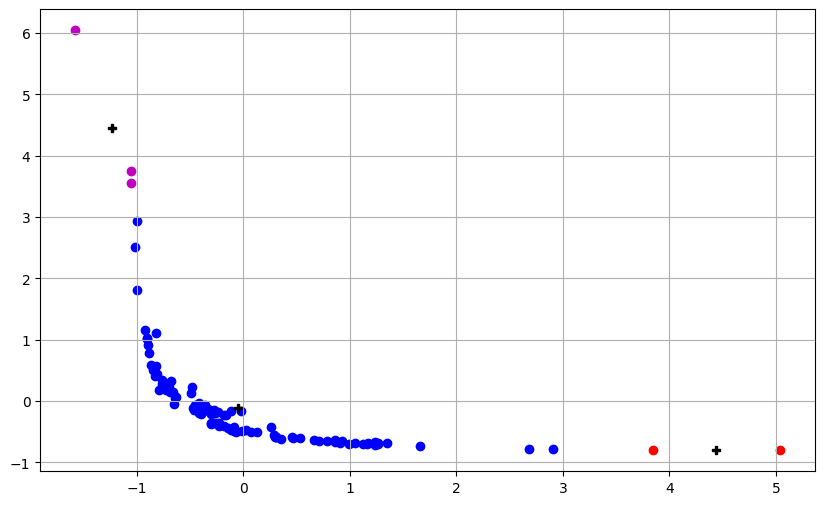

Количество кластеров: 3
Центроиды: [[-0.05  -0.114]
 [-1.228  4.45 ]
 [ 4.44  -0.8  ]]
Объем кластеров: [103, 3, 2]
+-------+--------------------+----------------+
|   R   | Центроиды кластера | Объем кластера |
+-------+--------------------+----------------+
| 9.521 |     [0.0, 0.0]     |      108       |
| 4.521 |  [-0.033, -0.049]  |      106       |
|       |  [5.038, -0.803]   |       1        |
|       |  [-1.574, 6.046]   |       1        |
| 3.721 |  [-0.05, -0.114]   |      103       |
|       |   [-1.228, 4.45]   |       3        |
|       |    [4.44, -0.8]    |       2        |
| 3.521 |  [-0.05, -0.114]   |      103       |
|       |   [-1.228, 4.45]   |       3        |
|       |    [4.44, -0.8]    |       2        |
| 3.321 |  [-0.05, -0.114]   |      103       |
|       |   [-1.228, 4.45]   |       3        |
|       |    [4.44, -0.8]    |       2        |
+-------+--------------------+----------------+


In [107]:
table3 = PrettyTable(["R","Центроиды кластера","Объем кластера"])
for i in range(len(R)):
    R[i]=R[i]+0.001
    mid,cl,kol_el=forel(x_main,y_main,R[i]) 
    for k in range(len(cl)):
        for j in range(len(mid[k])):
            mid[k][j]=round(mid[k][j],3)   
    table3.add_row([round(R[i],3),mid[0],kol_el[0]])
    for j in range(1,len(cl)):
        table3.add_row(["",mid[j],kol_el[j]])
    gr(mid,cl)
    print("Количество кластеров:",len(cl))
    print("Центроиды:", np.array(mid))
    print("Объем кластеров:",kol_el)
    
print(table3)

### 9. Сравнить методы. Сделать выводы

Используя метод силуэтов, мы выяснили, что для первого алгоритма оптимальное количесвто кластеров = 2, а для второго = 4. Сравнивая методы, можно сказать, что удобнее будет исползовать методы k-means или k-medians, так как разница между объемами кластеров существенна.

## Выводы:

Освоение основных понятий и некоторых методов кластерного анализа,
в частности, метода k-means и метода поиска сгущений.

В практической работе были выполнены поставленные цели и задачи: oсвоены основные понятия кластерного анализа, найдена «грубая» верхняя оценка количества кластеров, выполнено разбиение множества объектов на конечное число кластеров с помощью методов: k-means, k-medians и forel, найдено оптимальное количество кластеров (для первого = 2, для второго = 4.)
